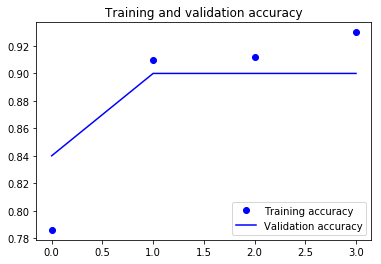

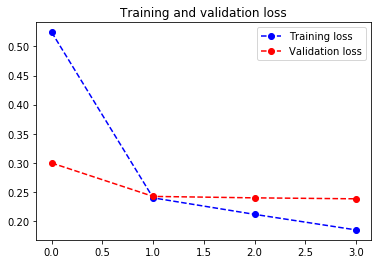

This took 13.483705043792725 seconds


In [2]:
import scipy.io as sio
import urllib.request
import os.path as op
import matplotlib.pyplot as plt
import time

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, LeakyReLU
from keras.layers import Conv2D, MaxPooling2D

t1 = time.time()

if not op.exists('fashion.mat'):
    urllib.request.urlretrieve("https://s3.amazonaws.com/assets.datacamp.com/production/course_6052/datasets/fashion.mat", "fashion.mat")

#_mat = sio.loadmat('/usr/local/share/datasets/fashion.mat')
_mat = sio.loadmat('./fashion.mat')

x_train = _mat['x_train']
x_test = _mat['x_test']
y_train = _mat['y_train']
y_test = _mat['y_test']

img_rows = 28
img_cols = 28
batch_size = 10
epochs = 4
num_classes = 3
input_shape = (img_rows, img_cols, 1)

# This is the model from the Keras documentation:
# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3),
#                  activation='relu',
#                  input_shape=input_shape))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))

#This is the model from https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear',input_shape=(28,28,1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(Dropout(0.25))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


training = model.fit(x_train, y_train,
                     batch_size=batch_size,
                     epochs=epochs,
                     verbose=0,
                     validation_data=(x_valid, y_valid))

score = model.evaluate(x_test, y_test, verbose=0)


accuracy = training.history['acc']
val_accuracy = training.history['val_acc']
loss = training.history['loss']
val_loss = training.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo--', label='Training loss')
plt.plot(epochs, val_loss, 'ro--', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

print("This took %s seconds" % (time.time() - t1) )


In [4]:
y_train.shape

(500, 3)